<a href="https://colab.research.google.com/github/001ckk/Moringa-week-4-IP/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2022_04_Christopher_Kimani_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv('Autolib_dataset (2) (1).csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [3]:
# Checking missing values

num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [4]:
# dropping two columns (Displayed comment and Scheduled at) since they do not contain any information.
# the two columns do not contain any meaningful information. 

df.drop(['Displayed comment','Scheduled at'],axis = True, inplace = True )
df.shape

(5000, 23)

In [5]:
# Adjusting the column names 

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,...,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,...,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,...,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,...,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,...,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,...,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,...,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,...,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,...,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,...,operational,3,station,ok,nonexistent,2018,4,4,17,27


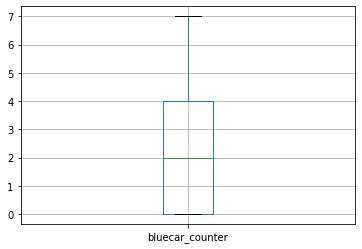

In [6]:
# Checking for outliers in the bluecar_counter column 

df.boxplot(column =['bluecar_counter'], grid = True) 

# Counclusion 
# There were no outliers for this outcome.

In [7]:
# Checking and dropping duplicates if there are any.

df_clean =  df.drop_duplicates()
df_clean 

# This is our clean data that we will use for analysis


,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,...,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,...,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,...,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,...,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,...,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,...,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,...,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,...,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,...,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,...,operational,3,station,ok,nonexistent,2018,4,4,17,27


In [8]:
df.columns.values.tolist()

['address',
 'cars',
 'bluecar_counter',
 'utilib_counter',
 'utilib_1.4_counter',
 'charge_slots',
 'charging_status',
 'city',
 'id',
 'kind',
 'geo_point',
 'postal_code',
 'public_name',
 'rental_status',
 'slots',
 'station_type',
 'status',
 'subscription_status',
 'year',
 'month',
 'day',
 'hour',
 'minute']

In [9]:
# Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
# Columns required: bluecar_counter, hour, day, city, month, year 

df1 = df[['bluecar_counter','hour','day', 'city','month','year']]
df1.shape

(5000, 6)

In [10]:
# Conditions 
# City = Paris 
# Month = April 
# Year = 2018

df2 = df1.loc[(df1['city'] == 'Paris') & (df1['month'] == 4) & (df1['year'] == 2018)]
df2

,bluecar_counter,hour,day,city,month,year
0,0,11,8,Paris,4,2018
1,6,7,6,Paris,4,2018
3,3,4,4,Paris,4,2018
4,3,17,8,Paris,4,2018
5,0,7,6,Paris,4,2018
...,...,...,...,...,...,...
4992,0,23,9,Paris,4,2018
4994,0,20,1,Paris,4,2018
4996,4,16,4,Paris,4,2018
4997,1,7,1,Paris,4,2018


In [11]:
# Arranging the days from the first day to the last day (ascending order) and from the first hour to the last hour.
# This shows for each day and each hour the number of bluecar_counters orderd 

df2.sort_values(by = ['day','hour']).head(48)

,bluecar_counter,hour,day,city,month,year
123,0,0,1,Paris,4,2018
459,3,0,1,Paris,4,2018
978,2,0,1,Paris,4,2018
1026,4,0,1,Paris,4,2018
1046,0,0,1,Paris,4,2018
1107,0,0,1,Paris,4,2018
2059,1,0,1,Paris,4,2018
2182,0,0,1,Paris,4,2018
2410,2,0,1,Paris,4,2018
2874,0,0,1,Paris,4,2018


In [12]:
# The sum of green cars orderd per day 

df3 = df.groupby(['day','hour'])['bluecar_counter'].sum()
df3.head

<bound method NDFrame.head of day  hour
1    0       73
     1       51
     2       58
     3       56
     4       61
             ..
9    19      51
     20      56
     21      92
     22      69
     23      51
Name: bluecar_counter, Length: 213, dtype: int64>

In [13]:
# The most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
# The aggregate for the whole month per hour.

df3 = df.groupby(['hour'])['bluecar_counter'].sum()
df3.head


# The most popular hour of the day in the whole month is the hour with the highest (sum) of green cars.
# This is the 6th hour with 608 green cars ordered over the whole month.

<bound method NDFrame.head of hour
0     483
1     493
2     559
3     549
4     512
5     552
6     608
7     555
8     472
9     515
10    475
11    502
12    491
13    537
14    418
15    449
16    463
17    432
18    427
19    387
20    411
21    503
22    441
23    434
Name: bluecar_counter, dtype: int64>

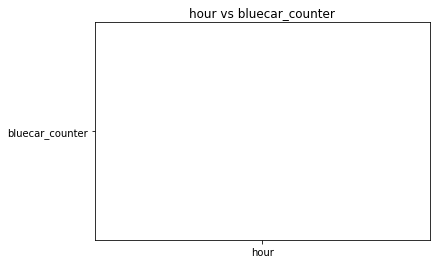

In [14]:
import matplotlib.pyplot as plt

plt.bar('hour','bluecar_counter', color ='blue',
        width = 0.4)
 
plt.title("hour vs bluecar_counter")
plt.show()